<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Plot-the-cost-and-stop" data-toc-modified-id="Plot-the-cost-and-stop-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot the cost and stop</a></span></li><li><span><a href="#Understanding-the-bumps-by-reconstructing-the-history-of-total-cost" data-toc-modified-id="Understanding-the-bumps-by-reconstructing-the-history-of-total-cost-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Understanding the bumps by reconstructing the history of total cost</a></span></li></ul></div>

We have huge bumps for 25 nodes which prevents getting to the optimal point. How can we understand what is happening? 

# Load

In [1]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from result_analysis import plot_ri, print_final_flows, plot_cost_all_path

import pandas as pd

from result_analysis import plot_stop_and_cost

In [76]:
n_nodes=25
subfolder='ni_comparison_bumps'

In [77]:
path='Data/'+str(n_nodes)+'Nodes/outputs/rel_prog/'+subfolder
path2='Data/'+str(n_nodes)+'Nodes/outputs/'+subfolder

In [78]:
print(os.listdir(path))

['output_L_10000_ni_100_no_50_ev_0.pkl']


In [79]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_100_no_50_ev_0.pkl


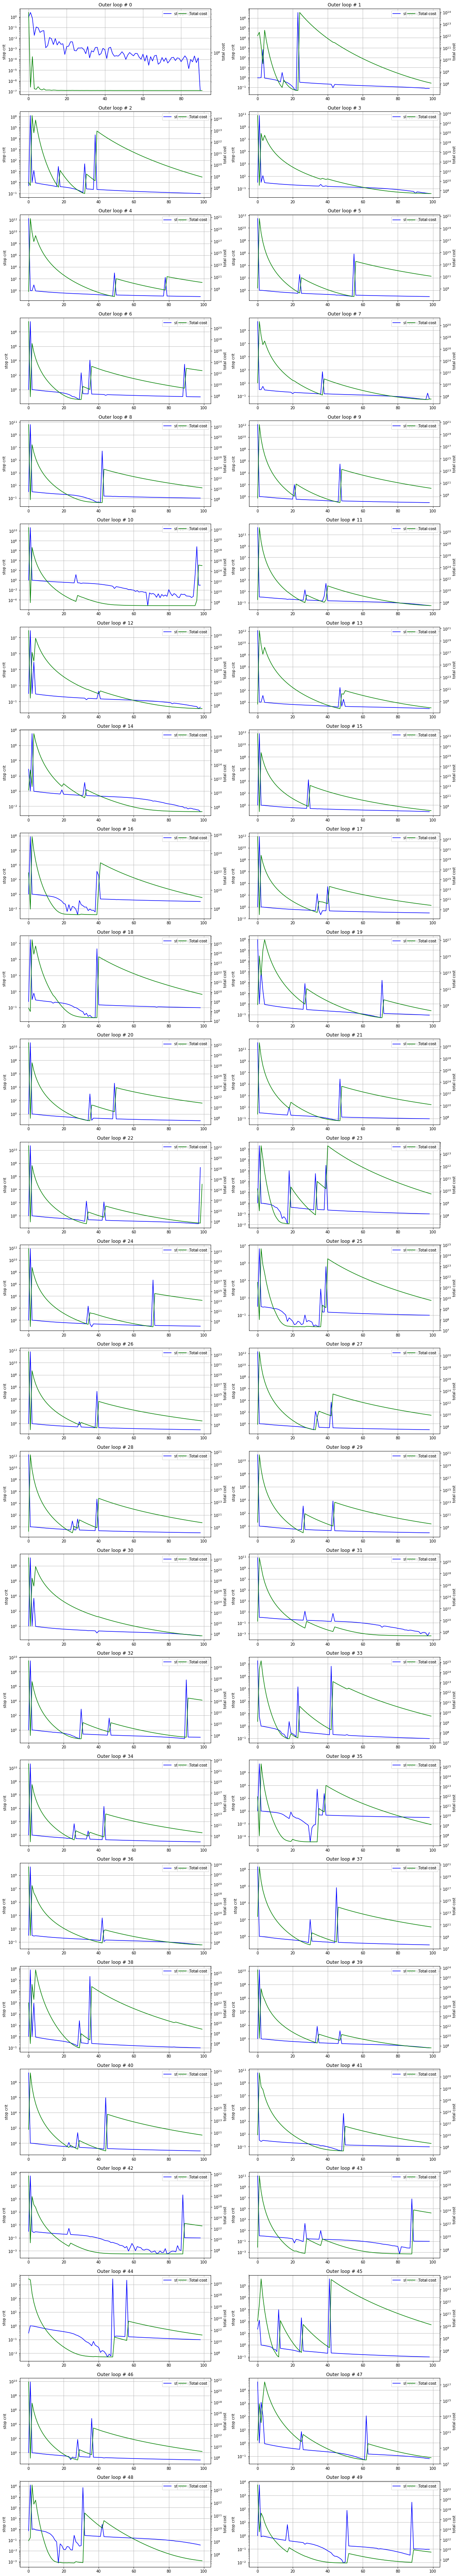

In [80]:
plot_stop_and_cost(opt_res)

We chose one outer iteration where the jumps are neat


In [82]:
ID=1

In [83]:
len(ri_FW)

51

In [85]:
G_ref=G_FW[ID]
opt_ref = opt_res[ID]
ri_ref=ri_FW[ID]

# Plot the cost and stop

In [74]:
path

'Data/25Nodes/outputs/rel_prog/ni_comparison_Bumps'

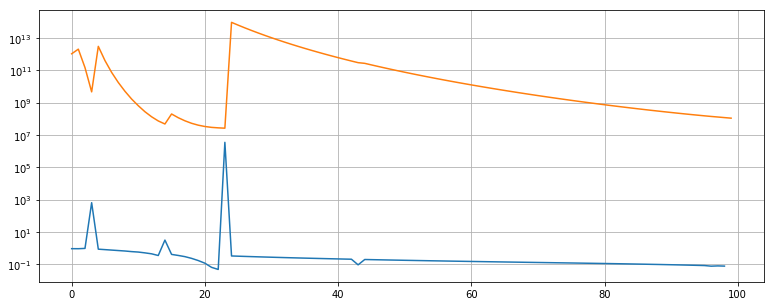

In [68]:
plt.figure(figsize=(13,5))
plt.plot(opt_ref['stop'])
plt.grid()
plt.yscale('log')
plt.plot(opt_ref['obj'])

The cost gains 6 orders of magnitude... Wtf? 

In [28]:
filename

'output_L_10000_ni_100_no_50_ev_0.pkl'

In [69]:
lims=[20,30]

(20, 30)

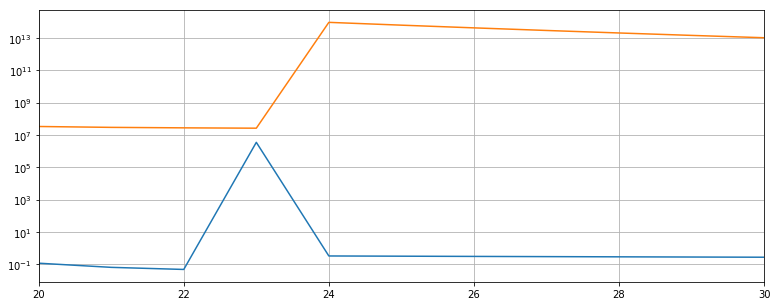

In [70]:
plt.figure(figsize=(13,5))
plt.plot(opt_ref['stop'])
plt.grid()
plt.yscale('log')
plt.plot(opt_ref['obj'])
plt.xlim(lims)

6 oom !!

# Understanding the bumps by reconstructing the history of total cost

In [71]:
from result_analysis import plot_edge_attrs

In [1]:
attrs=['f_m', 'f_r','cost','tot_cost' ]
# attrs=['f_m','f_r']
tot_cost, tot_cost_2 = plot_edge_attrs(G_ref,None,attrs,dots=False,lims=None)

NameError: name 'plot_edge_attrs' is not defined

When plotting the total cost from the loops and afterwards, they seem to match
Have to compare more in details, but they seem to match. 

So therefore 
- comparison
- potentially the rebalancing edges that are problematic? If they have a non zero flow? 

In [49]:
tot_cost.shape

(99, 92)

In [93]:
tot_cost_2.shape

NameError: name 'tot_cost_2' is not defined

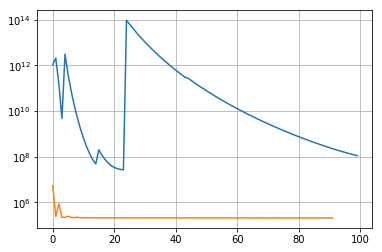

In [57]:
plt.figure()
plt.plot(opt_ref['obj'])
plt.plot(np.nansum(tot_cost,axis=0))
plt.grid()
plt.yscale('log')

I really do not see what is causing those bumps. The total cost is a direct function of the edge costs -- and of flows. I can't see any jump. I would have to decompose the total cost per edge and see where the jump is... 

There is really no indication on an edge level that such increases should happen... I don't understand

The way it is coded in the main code does not seem wrong to me so I really don't see what is causing those bumps...